<a href="https://colab.research.google.com/github/Tnembull/Datascience/blob/master/MY_Food_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data preprocessing

### Import packages

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import get_file

import os
import numpy as np
import matplotlib.pyplot as plt

import PIL.Image as Image

### Download data

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
train_dir = os.path.join('/content/drive/My Drive/Poto Makanan/train')
validation_dir = os.path.join('/content/drive/My Drive/Poto Makanan/validation')

In [0]:
train_mendoan_dir = os.path.join(train_dir, 'mendoan')  # directory with our training mendoan pictures
train_sate_ayam_dir = os.path.join(train_dir, 'sate_ayam')  # directory with our training sate ayam pictures
train_soto_ayam_dir = os.path.join(train_dir, 'soto_ayam')  # directory with our training soto ayam pictures
validation_mendoan_dir = os.path.join(validation_dir, 'mendoan')  # directory with our validation mendoan pictures
validation_sate_ayam_dir = os.path.join(validation_dir, 'sate_ayam')  # directory with our validation sate ayam pictures
validation_soto_ayam_dir = os.path.join(validation_dir, 'soto_ayam')  # directory with our validation soto ayam pictures

In [0]:
num_mendoan_tr = len(os.listdir(train_mendoan_dir))
num_sate_ayam_tr = len(os.listdir(train_sate_ayam_dir))
num_soto_ayam_tr = len(os.listdir(train_soto_ayam_dir))

num_mendoan_val = len(os.listdir(validation_mendoan_dir))
num_sate_ayam_val = len(os.listdir(validation_sate_ayam_dir))
num_soto_ayam_val = len(os.listdir(validation_soto_ayam_dir))

total_train = num_mendoan_tr + num_sate_ayam_tr + num_soto_ayam_tr 
total_val = num_mendoan_val + num_sate_ayam_val + num_soto_ayam_val

In [0]:
print('total training mendoan images:', num_mendoan_tr)
print('total training sate_ayam images:', num_sate_ayam_tr)
print('total training soto_ayam images:', num_soto_ayam_tr)

print('total validation mendoan images:', num_mendoan_val)
print('total validation sate_ayam images:', num_sate_ayam_val)
print('total validation soto_ayam images:', num_soto_ayam_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training mendoan images: 260
total training sate_ayam images: 260
total training soto_ayam images: 260
total validation mendoan images: 67
total validation sate_ayam images: 67
total validation soto_ayam images: 67
--
Total training images: 780
Total validation images: 201


## Data preprocessing

### Data generator

In [0]:
# Hyperparameter 1

batch_size = 128
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [0]:
train_data_gen = train_image_generator.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='categorical')

Found 780 images belonging to 3 classes.


In [0]:
val_data_gen = validation_image_generator.flow_from_directory(
    validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='categorical')

Found 201 images belonging to 3 classes.


### Visualize images

In [0]:
sample_training_images, _ = next(train_data_gen)

In [0]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

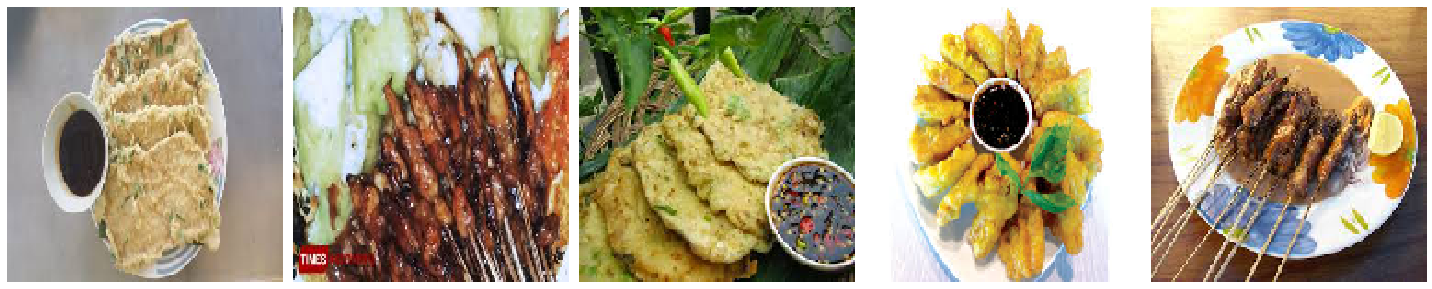

In [0]:
plotImages(sample_training_images[:5])

## Create the model

In [0]:
# Hyperparameter 2

model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),

    MaxPooling2D(),
    
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    # Dropout(0.2),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    # Dropout(0.2),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(128, activation='relu'),

    Dense(3, activation='softmax')
])

### Compile the model



In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Model summary
Summary digunakan untuk melihat dan mengecek konfigurasi model yang telah kita buat sebelumnya

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 18, 18, 128)      

In [0]:
# Hyperparameter 3

epochs = 20

In [0]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 6 steps, validate for 1 steps
Epoch 1/20
6/6 [==============================] - 234s 39s/step - loss: 1.1875 - accuracy: 0.3490 - val_loss: 1.1046 - val_accuracy: 0.3047
Epoch 2/20
6/6 [==============================] - 29s 5s/step - loss: 1.0654 - accuracy: 0.3880 - val_loss: 1.0613 - val_accuracy: 0.3750
Epoch 3/20
6/6 [==============================] - 20s 3s/step - loss: 0.9835 - accuracy: 0.4870 - val_loss: 0.8796 - val_accuracy: 0.5547
Epoch 4/20
6/6 [==============================] - 17s 3s/step - loss: 0.8050 - accuracy: 0.5782 - val_loss: 1.0337 - val_accuracy: 0.4844
Epoch 5/20
6/6 [==============================] - 17s 3s/step - loss: 0.7547 - accuracy: 0.6135 - val_loss: 0.7487 - val_accuracy: 0.5938
Epoch 6/20
6/6 [==============================] - 17s 3s/step - loss: 0.6630 - accuracy: 0.6503 - val_loss: 0.7519 - val_accuracy: 0.6094
Epoc

### Visualize training results

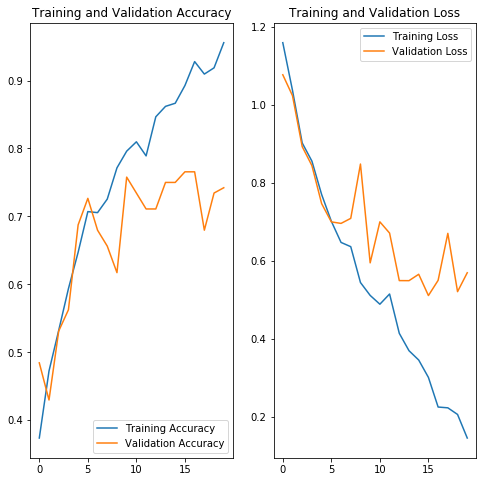

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Using the model

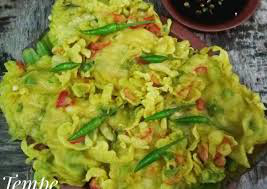

In [0]:
file_name = "/content/drive/My Drive/Poto Makanan/train/mendoan/200.jpg"
test_image = Image.open(file_name)
test_image

In [0]:
prep_img = test_image.resize((IMG_HEIGHT,IMG_WIDTH))
prep_img = np.array(prep_img)/ 255.0

[0]
Hasil prediksi: mendoan


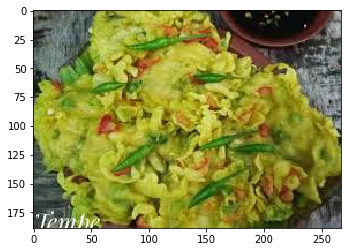

In [0]:
images = []
images.append(prep_img)
classes = model.predict_classes(np.array(images))
print (classes)
for n in classes:
  if n == 0:
      prediction = 'mendoan'
  if n == 1:
      prediction = 'sate_ayam'
  if n == 2:
      prediction = 'soto_ayam'
  print ("Hasil prediksi:", prediction)
plt.imshow(test_image)
plt.show()